<a href="https://colab.research.google.com/github/prasanth5reddy/D2L/blob/master/Linear%20Neural%20Networks/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [1]:
!pip install mxnet

Importing Libraries

In [0]:
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random
from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline

Generating Data Sets

In [0]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [4]:
print(features[0], labels[0])


[2.2122064 0.7740038]
<NDArray 2 @cpu(0)> 
[6.000587]
<NDArray 1 @cpu(0)>


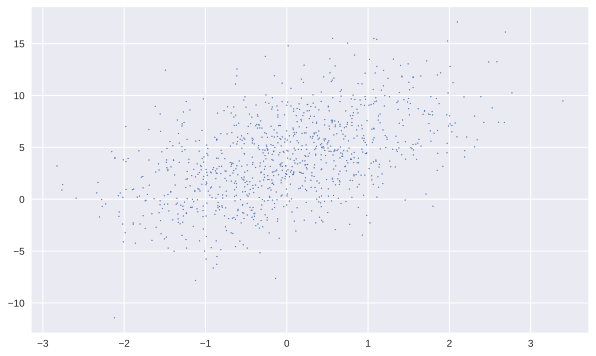

In [5]:
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # Set the size of the graph to be plotted
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.figure(figsize=(10, 6))
# plot between X1 and y
plt.scatter(features[:, 0].asnumpy(), labels.asnumpy(), 1);

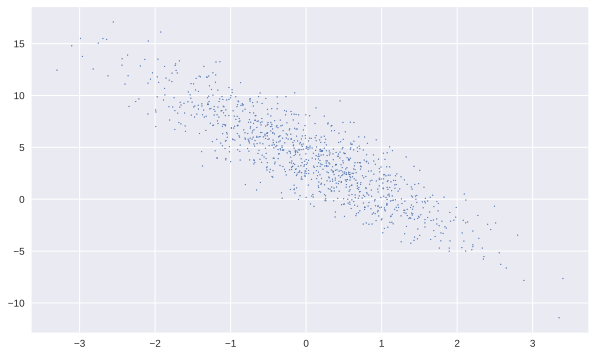

In [6]:
plt.figure(figsize=(10, 6))
# plot between X2 and y
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);
# we can see that the y fits more stronger to x2 rather than x1 because weight of x2 > x1

Reading Data

In [0]:
def data_iter(batch_size, features, labels):
  num_examples = len(features)
  indices = list(range(num_examples))
  
  random.shuffle(indices)
  
  for i in range(0, num_examples, batch_size):
    j = nd.array(indices[i : min(i + batch_size, num_examples)])
    yield features.take(j), labels.take(j)

In [8]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[ 0.7508367   0.64649147]
 [-1.8834633  -0.15658343]
 [-0.5227964  -0.649588  ]
 [ 0.3943117  -1.0634161 ]
 [-2.321787   -0.6055466 ]
 [-1.7132839   0.08990741]
 [-0.3834237   0.10732455]
 [-0.7517875   1.0374306 ]
 [-1.1443554  -0.2859367 ]
 [ 1.0731696   0.12017461]]
<NDArray 10x2 @cpu(0)> 
[ 3.5131779   0.9873036   5.3611174   8.621504    1.6192857   0.4671845
  3.0671327  -0.82968485  2.8830392   5.927642  ]
<NDArray 10 @cpu(0)>


Initialize Model Parameters

In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [0]:
w.attach_grad()
b.attach_grad()

Define the Model

In [0]:
def linreg(X, w, b):
    return nd.dot(X, w) + b

Define the Loss Function

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

Define the Optimization Algorithm

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

Training

In [14]:
lr = 0.03  # Learning rate
num_epochs = 3  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
  # do the mini batches until all are exhausted
  for X, y in data_iter(batch_size, features, labels):
    with autograd.record():
      l = loss(net(X, w, b), y)
    l.backward()
    sgd([w, b], lr, batch_size)
  train_l = loss(net(features, w, b), labels)
  print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.040699
epoch 2, loss 0.000159
epoch 3, loss 0.000050


Evaluation

In [15]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w 
[ 3.0910969e-04 -5.4597855e-05]
<NDArray 2 @cpu(0)>
Error in estimating b 
[0.00053883]
<NDArray 1 @cpu(0)>
